In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
#import logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
#import sci-kit learn libraries for model building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
#importing metrics for Regression model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
'''
machine error value 
1 * 10^-5 
'''

'\nmachine error value \n1 * 10^-5 \n'

In [3]:
logging.info('Import Dataset for model Building...')

In [4]:
url = 'https://raw.githubusercontent.com/preet-pandey/CementPredecition_Model/refs/heads/main/Concrete_Data.csv'
df = pd.read_csv('Concrete_Data.csv')
df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28,39.70
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
176,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,91,56.50
297,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,56,39.15
471,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28,57.03
...,...,...,...,...,...,...,...,...,...
915,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99
189,233.8,0.0,94.6,197.9,4.6,947.0,852.2,3,10.38
644,350.0,0.0,0.0,186.0,0.0,1050.0,770.0,28,34.29
620,254.0,0.0,0.0,198.0,0.0,968.0,863.0,365,29.79


In [5]:
df.shape

(1030, 9)

In [6]:
df.columns 

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
# ols regression analysis
import statsmodels.api as sm
# X  = independent columns 
X =  df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
# y = dependent column : target column
y = df['Concrete compressive strength(MPa, megapascals) ']
#but this is not use in now a days

In [8]:
X = sm.add_constant(X)

In [9]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 05 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      20:11:32   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#Checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [11]:
#checking describe stats:EDA (this code is work with numerical data not work with categorical data )
# Univariate Analysis
from collections import OrderedDict

stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) -  df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurtosis()
    })
    stats.append(numerical_stats)
    # saving all orderdict dictionary into dataframe : structured format 
    report = pd.DataFrame(stats)

report
# standard deviation = distance between mean and data points idol value is = (1)
# And also use when mean and median will be same
# skewness  = spread of the data 
# kurtosis = show the IQR spread 
#how to convert categorical to numerical we use (label encoder)

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


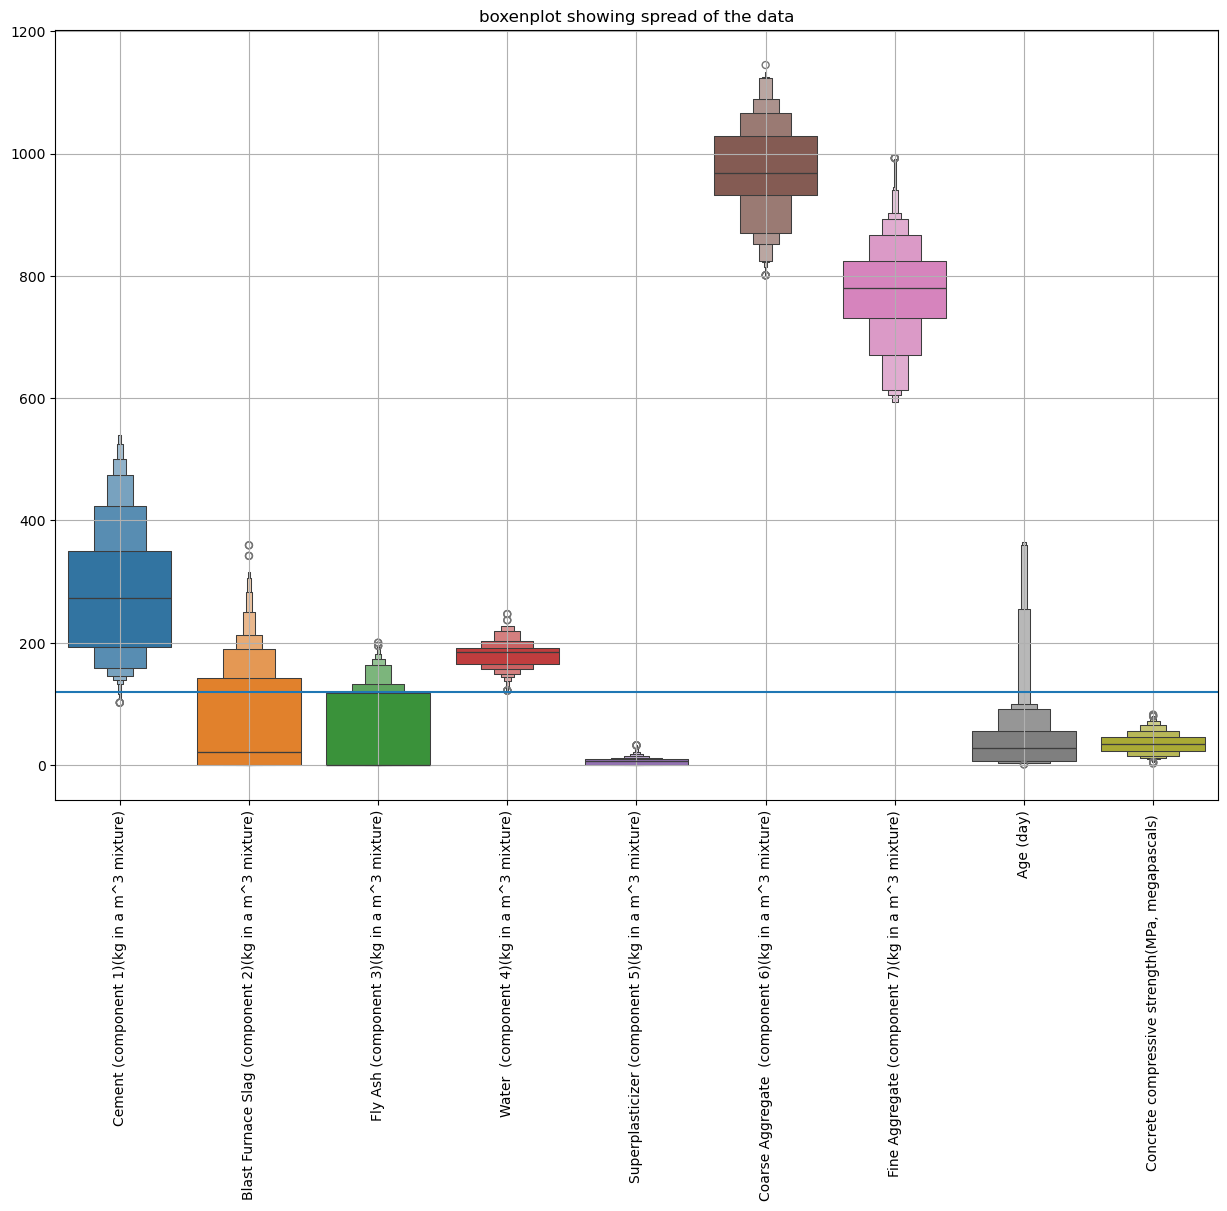

In [12]:
'''
note(kurtosis)
1. positive kurtosis = leptokurtic 
2. normal dstribution = mesokurtic
3. negative kurtosis = platykurtic (bekar hai because of higher variance)
.............................................
note (skewness)
1.positive skewness = mode<median<mean
2.No skewness = normaly distributed : mean = median = mode
3.Negative skewness = mean<median<mode
'''
plt.figure(figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title("boxenplot showing spread of the data")
plt.grid()
plt.show()          


In [13]:
df.median()

Cement (component 1)(kg in a m^3 mixture)                272.900
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     22.000
Fly Ash (component 3)(kg in a m^3 mixture)                 0.000
Water  (component 4)(kg in a m^3 mixture)                185.000
Superplasticizer (component 5)(kg in a m^3 mixture)        6.400
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     968.000
Fine Aggregate (component 7)(kg in a m^3 mixture)        779.500
Age (day)                                                 28.000
Concrete compressive strength(MPa, megapascals)           34.445
dtype: float64

Text(0.5, 1.0, 'heatmap showing correlation w.r.t target column')

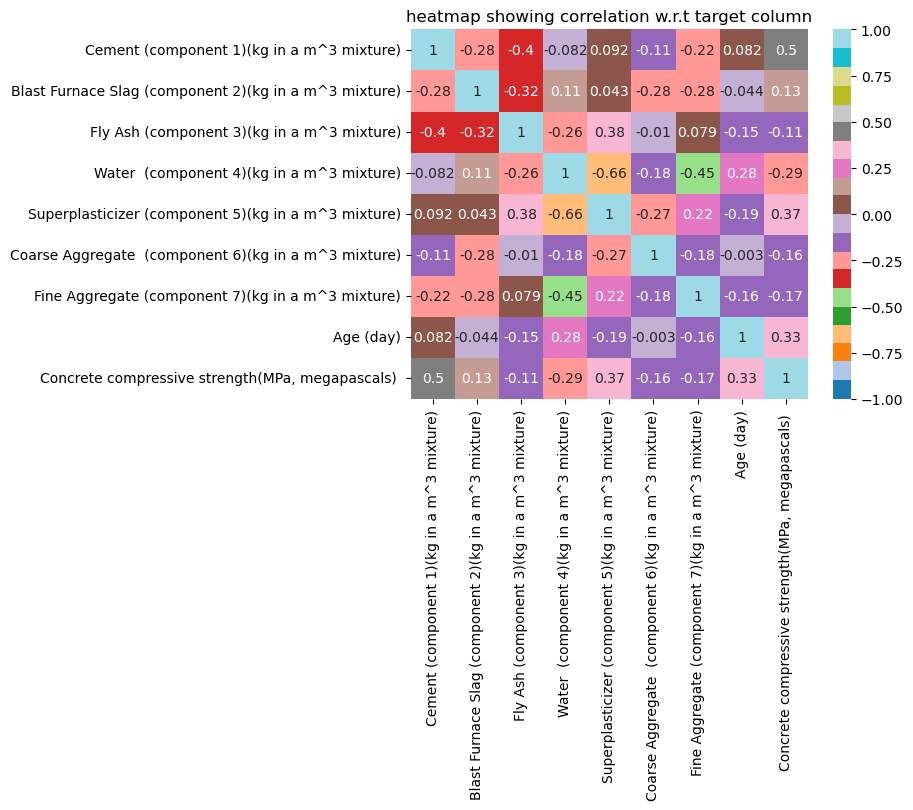

In [14]:
# corr =  correlation
#(annot) is show the numbers  
sns.heatmap(df.corr(),annot = True,center = 0, vmax = 1,vmin = -1, cmap = "tab20")
plt.title("heatmap showing correlation w.r.t target column")


In [ ]:
df['Cement (comp

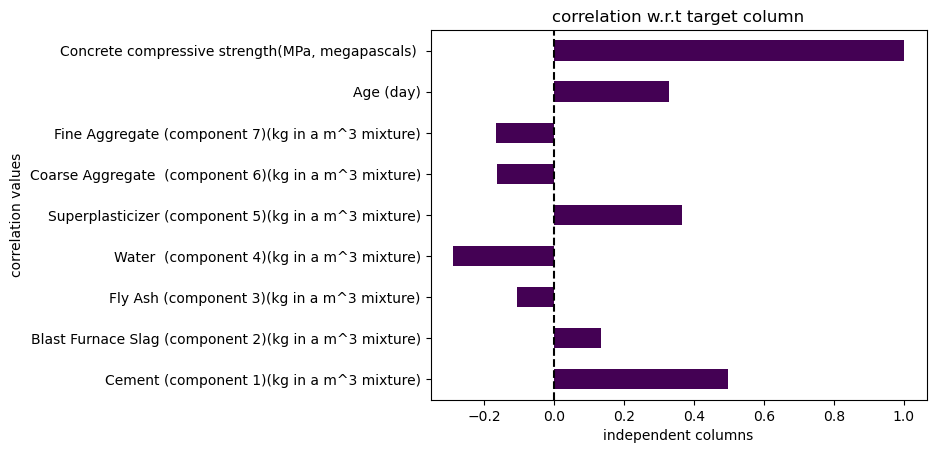

In [15]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh',cmap = "viridis")
plt.axvline(0,linestyle = '--',color = 'black')
plt.title('correlation w.r.t target column')
plt.ylabel('correlation values')
plt.xlabel('independent columns')
plt.show()

In [16]:
#Data Cleaning and Preprocessing

In [17]:
#checking top five Rows of dataset
'''
1.As the dataset contains no categorical column, hence no need of converting categorical column to numerical columns 
2.no missing values present in given dataset.
'''
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [18]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [19]:
#preventing data leackage
# step 1: split the dataset intop X and y
# where X: independet columns and  y : dependent column : target column
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

# step 2: using Train Test split
# test_Size lies between 0.20 to 0.35
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42) 

#step 3 : scaling Technique
#values coming in one range
sc = MinMaxScaler()

#seen data (important) (mean we see the data and we continuing the model building)
X_train = sc.fit_transform(X_train)

#unseen data 
X_test = sc.transform(X_test)

In [20]:
X_train.max(),X_train.min()

(1.0000000000000002, 0.0)

In [21]:
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [22]:
#Model building   when the target column in numeric in nature then we use the (linear regression)
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print('Model Accuracy for Linear Regresion',r2_score(y_test,y_pred_LR))



Model Accuracy for Linear Regresion 0.5943782479239215


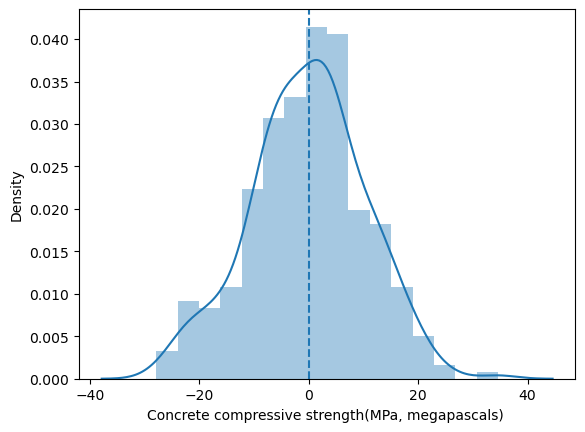

In [23]:
sns.distplot(y_test-y_pred_LR)
plt.axvline(0,linestyle='--')

Text(0, 0.5, 'Y_pred')

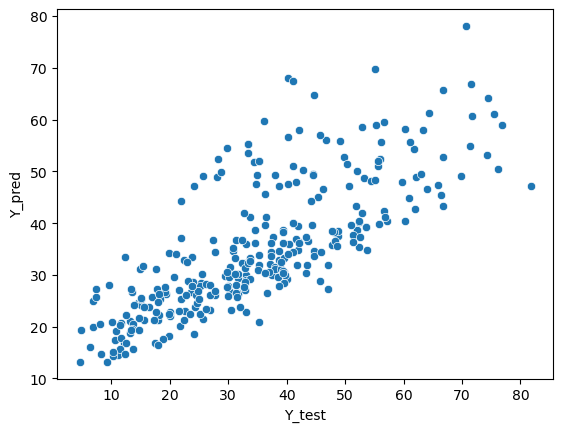

In [24]:
sns.scatterplot(x = y_test, y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

Text(0, 0.5, 'Y_pred')

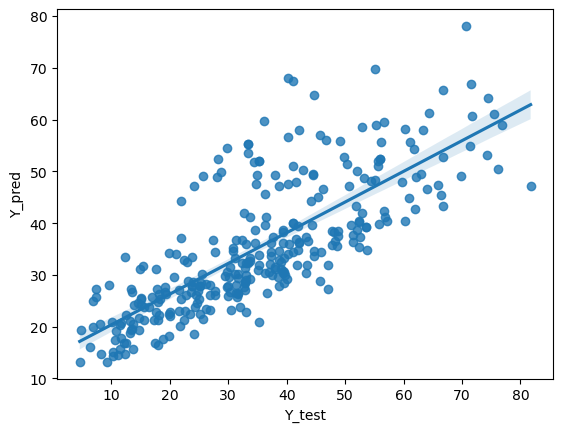

In [25]:
#model perforamnce : linear regression
sns.regplot(x = y_test, y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [26]:
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [27]:
# Evaluate constant value
LR.intercept_

-13.616932642237451

In [28]:
 # decision tree regressor
#when my data is non normal distribution then we use DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('the model accuracy for  Decision Tree Regressor',r2_score(y_test,y_pred_DT))

the model accuracy for  Decision Tree Regressor 0.8311328381808032


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

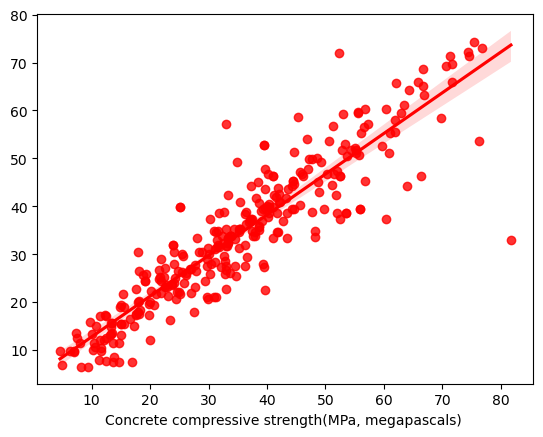

In [29]:
sns.regplot(x = y_test, y = y_pred_DT, color = 'red')

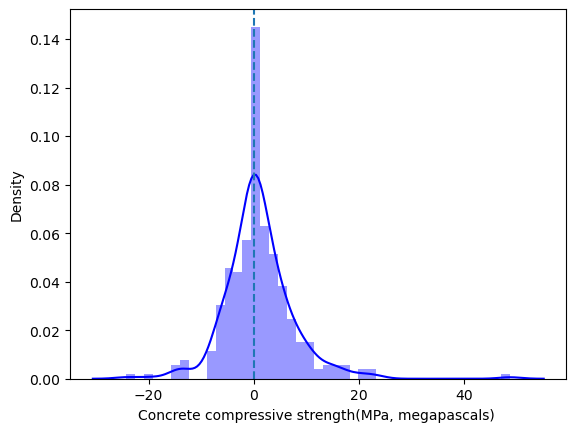

In [30]:
sns.distplot(y_test-y_pred_DT,color = 'blue')
plt.axvline(0,linestyle ='--')

In [31]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('the model accuracy for  RandomForestRegressor',r2_score(y_test,y_pred_RF))


the model accuracy for  RandomForestRegressor 0.8800123705966483


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

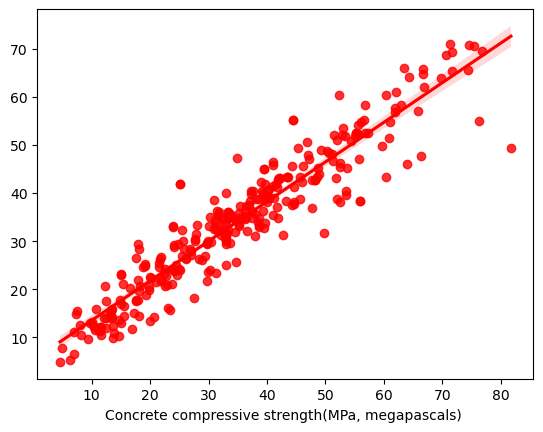

In [32]:
#model performance
sns.regplot(x = y_test, y = y_pred_RF, color = 'red')

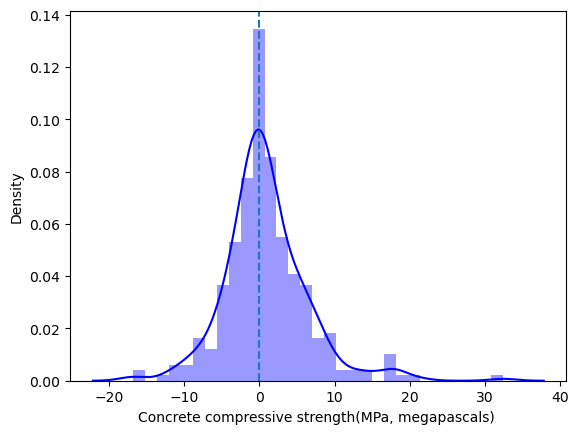

In [33]:
sns.distplot(y_test-y_pred_RF,color = 'blue')
plt.axvline(0,linestyle ='--')

In [34]:
 Features = RF.feature_importances_

In [35]:
feature_names = X.columns
importance_df = pd.Series(Features, index = feature_names)
importance_df


Cement (component 1)(kg in a m^3 mixture)                0.332567
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.070608
Fly Ash (component 3)(kg in a m^3 mixture)               0.019726
Water  (component 4)(kg in a m^3 mixture)                0.114424
Superplasticizer (component 5)(kg in a m^3 mixture)      0.068179
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.027589
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.037719
Age (day)                                                0.329188
dtype: float64

In [36]:
# using Xgboost model
import xgboost as xg
xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('the model accuracy for XGBoost Regressor: ',r2_score(y_test,y_pred_xgb))


the model accuracy for XGBoost Regressor:  0.9104444067517969


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

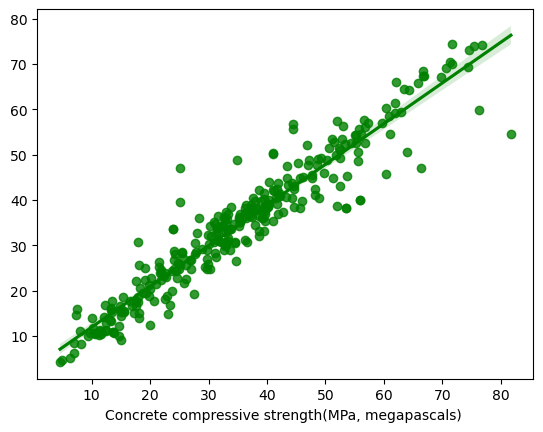

In [37]:
sns.regplot(x=y_test,y=y_pred_xgb,color='green')

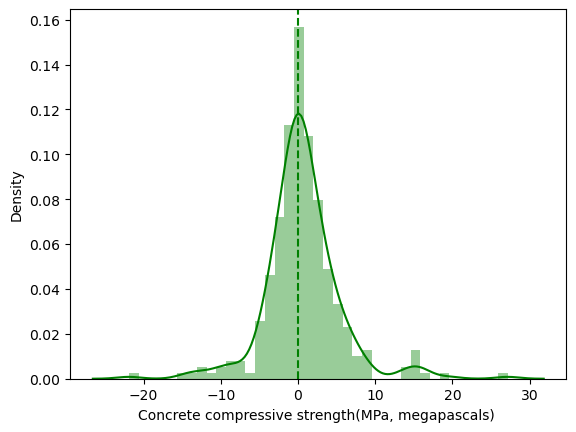

In [38]:
sns.distplot(y_test-y_pred_xgb,color = 'green')
plt.axvline(0,linestyle='--',color='green')

In [39]:
#Adaboost model
from sklearn.ensemble import AdaBoostRegressor

Ada = AdaBoostRegressor().fit(X_train,y_train)
y_pred_Ada = Ada.predict(X_test)

print("model accuracy of AdaboostRegressor :", r2_score(y_test,y_pred_Ada))


model accuracy of AdaboostRegressor : 0.7788825868832264


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

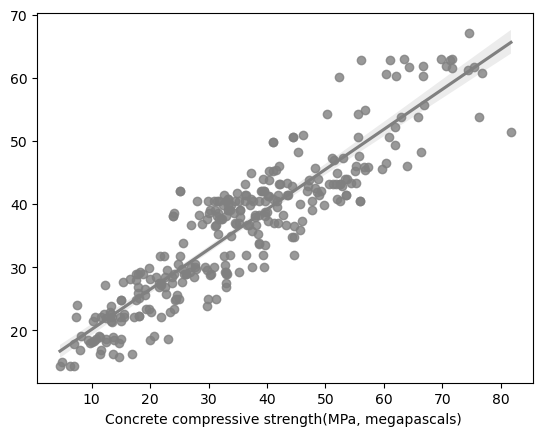

In [40]:
sns.regplot(x=y_test,y=y_pred_Ada,color='grey')

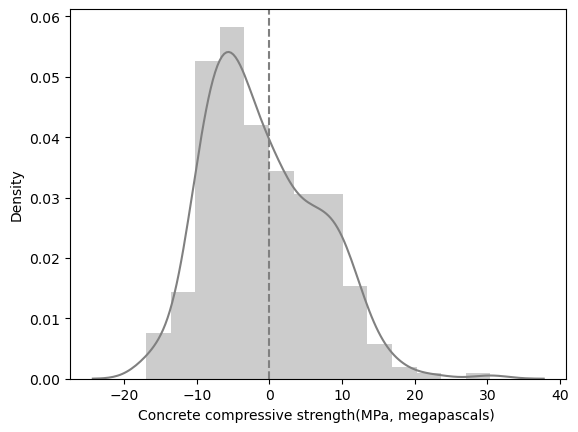

In [41]:
sns.distplot(y_test-y_pred_Ada,color = 'grey')
plt.axvline(0,linestyle='--',color='grey')

In [42]:
#gradientboost model
from sklearn.ensemble import GradientBoostingRegressor
GRE = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GRE = GRE.predict(X_test)

print("model accuracy of GradientBoostingRegressor :", r2_score(y_test,y_pred_GRE))


model accuracy of GradientBoostingRegressor : 0.8910917730073046


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

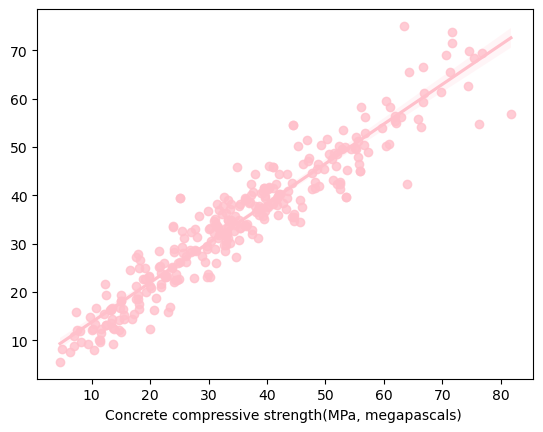

In [43]:
sns.regplot(x=y_test,y=y_pred_GRE,color='pink')

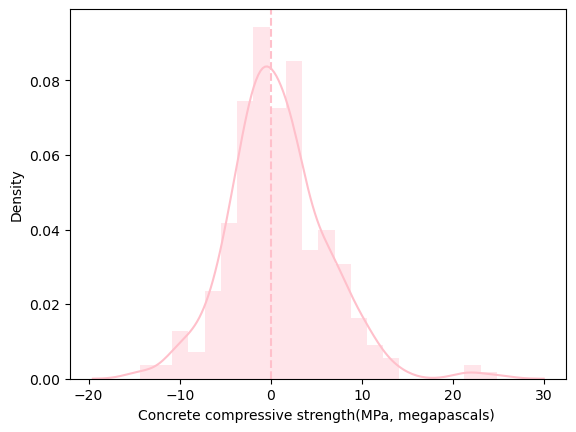

In [44]:
sns.distplot(y_test-y_pred_GRE,color = 'pink')
plt.axvline(0,linestyle='--',color='pink')

In [45]:
#KNN algorithm 
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors = 3).fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)

print("model accuracy of KNeighborsRegressor :",r2_score(y_test,y_pred_KNN))

model accuracy of KNeighborsRegressor : 0.6432363253853279


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

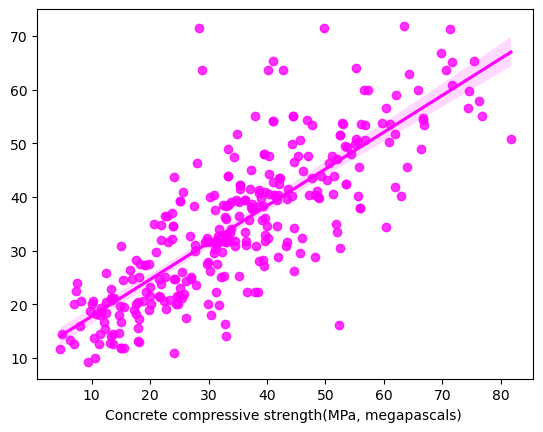

In [46]:
sns.regplot(x=y_test,y=y_pred_KNN,color='magenta')

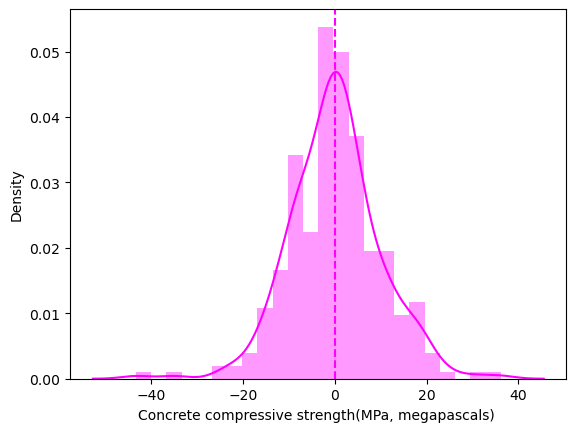

In [47]:
sns.distplot(y_test-y_pred_KNN,color = 'magenta')
plt.axvline(0,linestyle='--',color='magenta')

In [49]:
from sklearn.model_selection import RandomizedSearchCV

#Initializa the model
RF = RandomForestRegressor(random_state=42)

#define hyperparameter grid
param_dist = {
    'n_estimators':[100, 200, 300, 500],
    'max_depth':[None, 10,20,30],
    'min_samples_split':[2, 3, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['auto','sqrt','log2']

}
#Randomforestsearchcv setup
random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)
#fit to training data
random_search.fit(X_train,y_train)

#best model
best_rf = random_search.best_estimator_
print("best parameters:",random_search.best_params_)
print("best R2 score on cv:",random_search.best_score_)

best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
best R2 score on cv: 0.8932331477435091
